In [1]:
%matplotlib inline

import sys 
sys.path.append("../")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pgtaa.config import *
from pgtaa.core.utils_data import df_info

plt.style.use('bmh')

In [2]:
df = pd.read_csv(ENV_CSV, index_col=0, parse_dates=True)
train = pd.read_csv(TRAIN_CSV, index_col=0, parse_dates=True)
test = pd.read_csv(TEST_CSV, index_col=0, parse_dates=True)
df.shape, train.shape, test.shape

((3471, 32), (3123, 32), (348, 32))

In [3]:
assets = df.iloc[:,:8]
assets_train = train.iloc[:,:8]
assets_test = test.iloc[:,:8]

In [4]:
# compounded returns
assets = np.log(assets.pct_change(1) + 1)
assets_train = np.log(assets_train.pct_change(1) + 1)
assets_test = np.log(assets_test.pct_change(1) + 1)

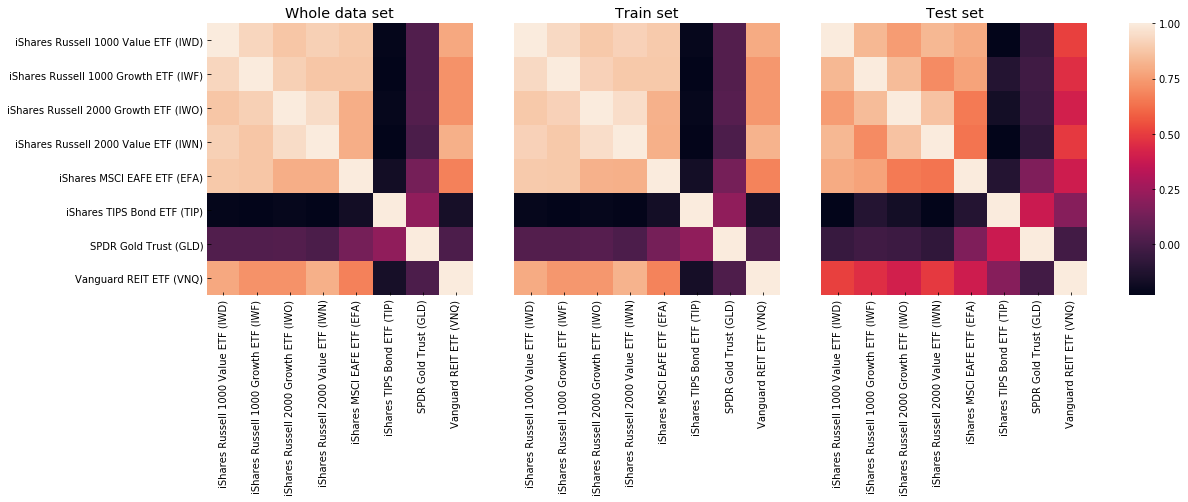

In [16]:
f,(ax1,ax2,ax3, axcb) = plt.subplots(1,4, figsize=(17,5),
            gridspec_kw={'width_ratios':[1,1,1,0.1]})
ax1.get_shared_y_axes().join(ax2,ax3)
g1 = sns.heatmap(assets.corr(),cbar=False,ax=ax1)
g1.set_title("Whole data set")
g1.set_ylabel('')
g1.set_xlabel('')
g2 = sns.heatmap(assets_train.corr(),cbar=False,ax=ax2)
g2.set_title("Train set")
g2.set_ylabel('')
g2.set_xlabel('')
g2.set_yticks([])
g3 = sns.heatmap(assets_test.corr(),ax=ax3, cbar_ax=axcb)
g3.set_title("Test set")
g3.set_ylabel('')
g3.set_xlabel('')
g3.set_yticks([])

# may be needed to rotate the ticklabels correctly:
for ax in [g1,g2,g3]:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=90)
    tly = ax.get_yticklabels()
    ax.set_yticklabels(tly, rotation=0)
plt.show()

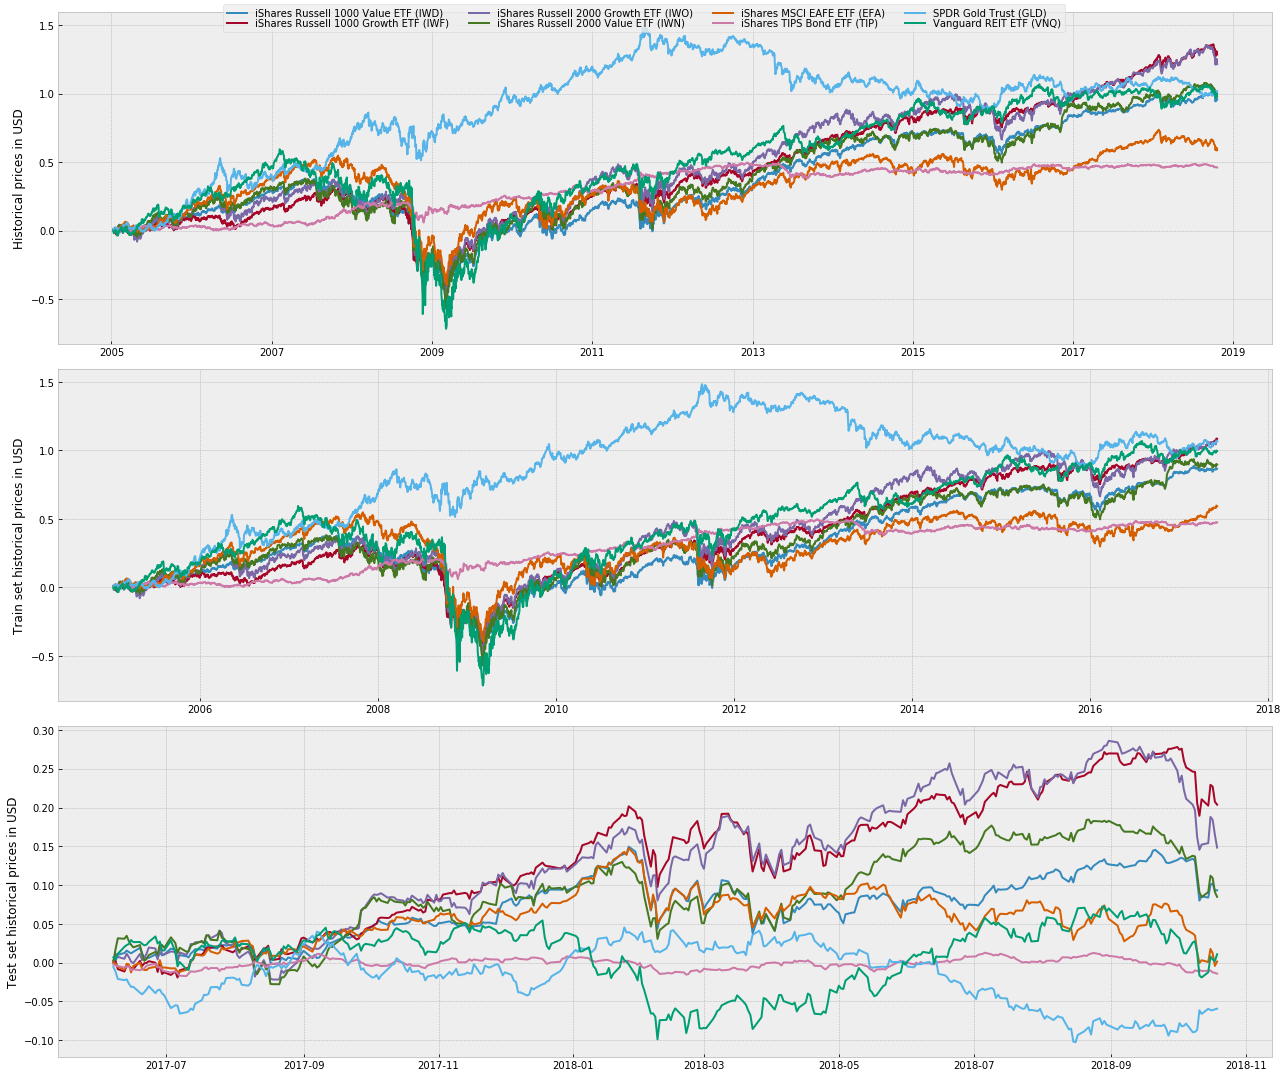

In [20]:
fig, axes = plt.subplots(3,1, sharex=False, figsize=(18,15))
l = axes[0].plot(assets.cumsum())
axes[0].set_ylabel('Historical prices in USD')
axes[1].plot(assets_train.cumsum())
axes[1].set_ylabel('Train set historical prices in USD')
axes[2].plot(assets_test.cumsum())
axes[2].set_ylabel('Test set historical prices in USD')
plt.figlegend(l, ASSET_NAMES, loc="upper center", ncol=4, labelspacing=0.)
plt.tight_layout()
plt.show()

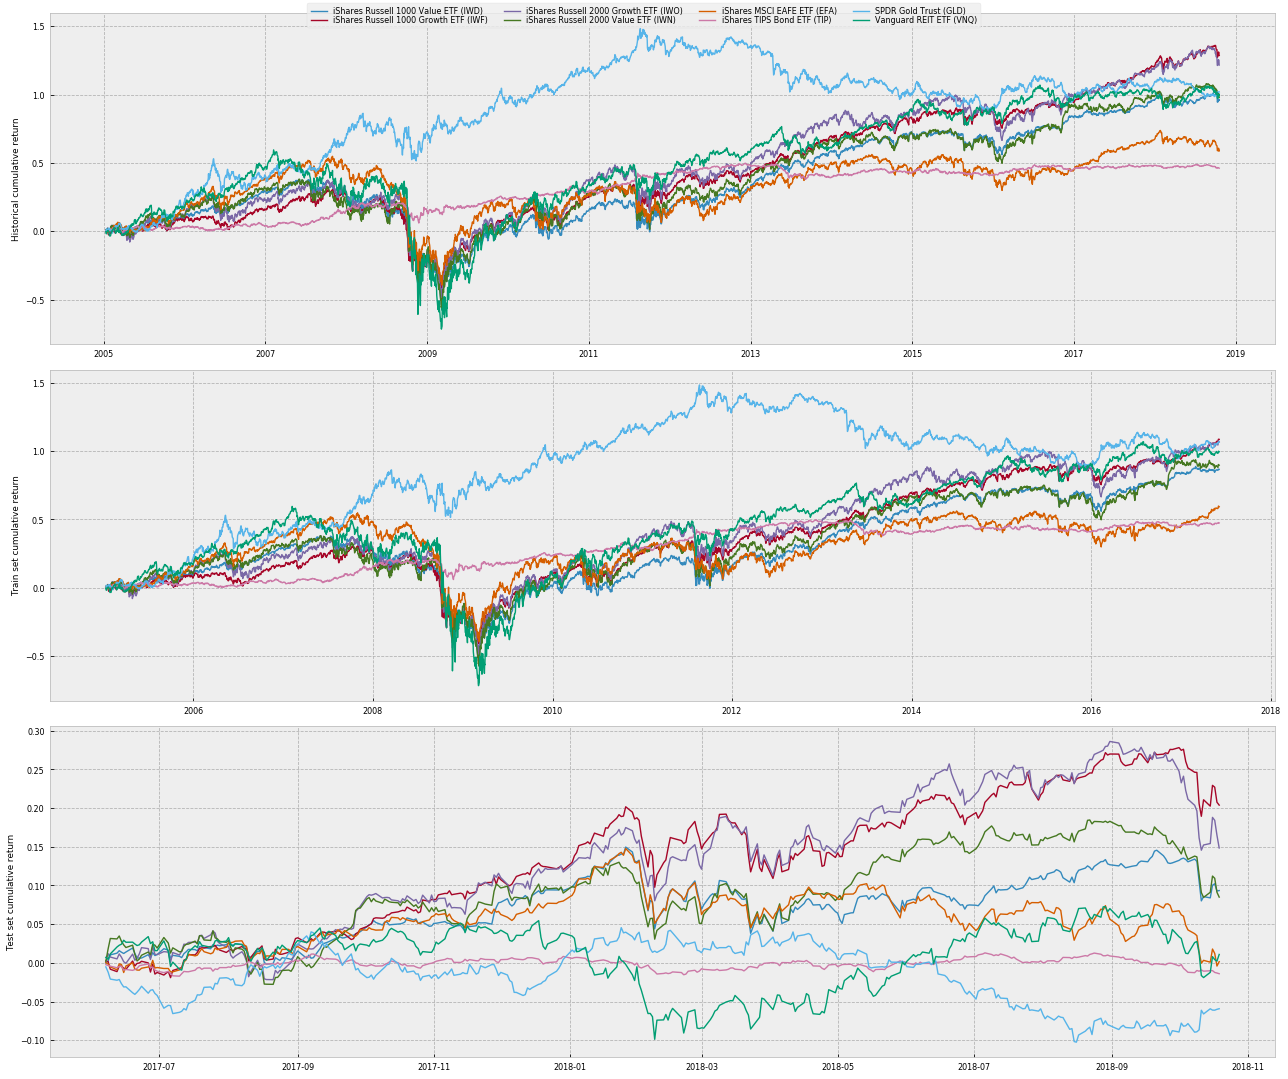

In [23]:
plt.style.use('seaborn-paper')
fig, axes = plt.subplots(3,1, sharex=False, figsize=(18,15))
l = axes[0].plot(assets.cumsum())
axes[0].set_ylabel('Historical cumulative return')
axes[1].plot(assets_train.cumsum())
axes[1].set_ylabel('Train set cumulative return')
axes[2].plot(assets_test.cumsum())
axes[2].set_ylabel('Test set cumulative return')
plt.figlegend(l, ASSET_NAMES, loc="upper center", ncol=4, labelspacing=0.)
plt.tight_layout()
plt.show()

In [8]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']